In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy.stats import levene, normaltest, anderson, mannwhitneyu, shapiro, ttest_rel, ttest_ind

### Nairne, Pandeirada and Thompson propose “that human memory systems are ‘tuned’ to remember information that  is  processed  for  survival”.

In [2]:
#sns.set_context("talk")
sns.set_palette("PuBuGn_d")

In [3]:
df = pd.read_excel('Data_Replication_NairneEtAl_2008.xls', delimiter=";")
df.head()

,Subject,Condition,MeanRating_SurvivalWords,MeanRating_VacationWords,Mean_RememberedWords_Survival,Mean_RememberedWords_Vacation,ResponseTime_Survival,ResponseTime_Vacation
0,8,1,2.8750,2.4375,0.4375,0.4375,5150,5292
1,12,1,3.0625,2.6250,0.3750,0.3125,564,722
2,13,1,2.9375,3.1250,0.3750,0.5000,6147,6309
3,14,1,3.6250,2.5000,0.8125,0.7500,1852,1978
4,15,1,3.0000,2.1250,0.8125,0.5000,3811,3966


In [65]:
corrdf = df.corr()
corrdf

,Subject,Condition,MeanRating_SurvivalWords,MeanRating_VacationWords,Mean_RememberedWords_Survival,Mean_RememberedWords_Vacation,ResponseTime_Survival,ResponseTime_Vacation
Subject,1.000000,0.322543,-0.194302,0.003091,-0.220402,-0.270746,-0.301325,-0.318330
Condition,0.322543,1.000000,-0.452556,0.000000,0.203395,-0.175574,-0.000909,-0.046268
MeanRating_SurvivalWords,-0.194302,-0.452556,1.000000,-0.018100,0.108287,0.081120,0.153861,0.173593
MeanRating_VacationWords,0.003091,0.000000,-0.018100,1.000000,-0.056716,0.008352,0.148635,0.148826
Mean_RememberedWords_Survival,-0.220402,0.203395,0.108287,-0.056716,1.000000,0.567309,-0.073672,-0.080045
Mean_RememberedWords_Vacation,-0.270746,-0.175574,0.081120,0.008352,0.567309,1.000000,-0.119839,-0.109779
ResponseTime_Survival,-0.301325,-0.000909,0.153861,0.148635,-0.073672,-0.119839,1.000000,0.998942
ResponseTime_Vacation,-0.318330,-0.046268,0.173593,0.148826,-0.080045,-0.109779,0.998942,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
Subject                          38 non-null int64
Condition                        38 non-null int64
MeanRating_SurvivalWords         38 non-null float64
MeanRating_VacationWords         38 non-null float64
Mean_RememberedWords_Survival    38 non-null float64
Mean_RememberedWords_Vacation    38 non-null float64
ResponseTime_Survival            38 non-null int64
ResponseTime_Vacation            38 non-null int64
dtypes: float64(4), int64(4)
memory usage: 2.5 KB


Confirmatory analysisIn line with the original study, survival processing produced a significant recall advantage:

#### Mean Rating Words

Again,  the  survival  scenario  produced  significantly  higher  ratings  than  the  vacation  scenario  (2.95  vs.  2.51  compared with 2.91 vs. 2.61 of the original study)

- F(1, 37) = 44.34
- MSE = .087 
- p = .000 
- p2= .54.


#### Mean Remembered Words

- **F(1, 37) = 8.08**
- **MSE = .021**
- **p = .007**
- **p2= .18**

#### Mean Ranking Words

There were no significant differences in response time:
- **F(1, 37) = 2.49**
- **MSE = 6,580.606**
- **p = .123**
- **p2= .06**

In [66]:
len(df)

38

In [84]:
print("Media de palabras procesadas de NO SUPERVIVENCIA", np.mean(df["MeanRating_VacationWords"]))
print("Media de palabras procesadas de SUPERVIVENCIA", np.mean(df["MeanRating_SurvivalWords"]))

Media de palabras procesadas de NO SUPERVIVENCIA 2.5065789473684212
Media de palabras procesadas de SUPERVIVENCIA 2.950657894736842


## MeanRating_VacationWords

(array([ 1.,  0.,  0.,  0.,  5.,  6., 10., 11.,  4.,  1.]),
 array([1.75  , 1.9375, 2.125 , 2.3125, 2.5   , 2.6875, 2.875 , 3.0625,
        3.25  , 3.4375, 3.625 ]),
 <a list of 10 Patch objects>)

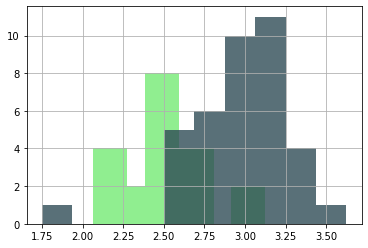

In [25]:
plt.grid()
plt.hist(df["MeanRating_VacationWords"],color = "lightgreen")
plt.hist(df["MeanRating_SurvivalWords"], alpha = 0.8)


In [87]:
# primero testeo si cumple las condiciones me dan valores mayores de 0.05
print("Vacation Words Rating: ",normaltest(df["MeanRating_VacationWords"]))
print("Survival Words Rating: ",normaltest(df["MeanRating_SurvivalWords"]))
print(levene(df["MeanRating_VacationWords"],df["MeanRating_SurvivalWords"]))

Vacation Words Rating:  NormaltestResult(statistic=1.8067344095602507, pvalue=0.4052029587112983)
Survival Words Rating:  NormaltestResult(statistic=18.436286194399614, pvalue=9.922276370161083e-05)
LeveneResult(statistic=0.2525333426193548, pvalue=0.6167891367898168)


In [90]:
d,p = stats.ttest_rel(df["MeanRating_VacationWords"],df["MeanRating_SurvivalWords"])
print("hay una diferencia estadistica significativa entre el Rating de las Vacation Words y las Survival Words,", p, "por lo que se descarta que no haya diferencia entre este rating")


hay una diferencia estadistica significativa entre el Rating de las Vacation Words y las Survival Words, 1.386865914072246e-07 por lo que se descarta que no haya diferencia entre este rating


## REMEBERED WORDS

(array([4., 1., 0., 1., 5., 4., 8., 4., 4., 7.]),
 array([0.     , 0.08125, 0.1625 , 0.24375, 0.325  , 0.40625, 0.4875 ,
        0.56875, 0.65   , 0.73125, 0.8125 ]),
 <a list of 10 Patch objects>)

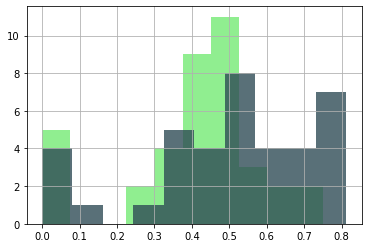

In [93]:
plt.grid()
plt.hist(df["Mean_RememberedWords_Vacation"],color = "lightgreen")
plt.hist(df["Mean_RememberedWords_Survival"], alpha = 0.8)

# primero testeo si cumple las condiciones me dan valores mayores de 0.05


In [94]:
print("Vacation Words Mean: ",normaltest(df["Mean_RememberedWords_Survival"]))
print("Survival Words Mean: ",normaltest(df["Mean_RememberedWords_Vacation"]))
print(levene(df["Mean_RememberedWords_Survival"],df["Mean_RememberedWords_Vacation"]))


Vacation Words Mean:  NormaltestResult(statistic=4.038235482186955, pvalue=0.13277255318910616)
Survival Words Mean:  NormaltestResult(statistic=5.439566000387676, pvalue=0.06588905078644205)
LeveneResult(statistic=1.88240630888408, pvalue=0.17420598746827928)


In [95]:
# DIFERENCIA MUESTRA
d1, p1= stats.ttest_rel(df["Mean_RememberedWords_Survival"],df["Mean_RememberedWords_Vacation"])
#P Value es mucho mayor a 0.05
print("hay una diferencia estadistica significativa entre el Promedio de las Vacation Words y las Survival Words recordadas de:", p1, "por lo que se descarta que no haya diferencia entre este promedio")


hay una diferencia estadistica significativa entre el Promedio de las Vacation Words y las Survival Words recordadas de: 0.007241045123816539 por lo que se descarta que no haya diferencia entre este promedio


In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
mean_squared_error(df["MeanRating_SurvivalWords"],df["MeanRating_VacationWords"])

0.3706825657894737

In [61]:
mean_squared_error(df["Mean_RememberedWords_Survival"],df["Mean_RememberedWords_Vacation"])

0.04903371710526316

In [52]:
mean_squared_error(df["ResponseTime_Survival"],df["ResponseTime_Vacation"])

13677.368421052632

## RESPONSE TIME

(array([11.,  5.,  3.,  7.,  7.,  2.,  1.,  1.,  0.,  1.]),
 array([  245.,  1316.,  2387.,  3458.,  4529.,  5600.,  6671.,  7742.,
         8813.,  9884., 10955.]),
 <a list of 10 Patch objects>)

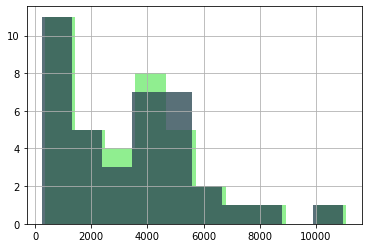

In [40]:
plt.grid()
plt.hist(df["ResponseTime_Vacation"],color = "lightgreen")
plt.hist(df["ResponseTime_Survival"], alpha = 0.8)


In [96]:
print("Vacation Words ResponseTime: ",normaltest(df["ResponseTime_Survival"]))
print("Survival Words ResponseTime: ",normaltest(df["ResponseTime_Vacation"]))
print(levene(df["ResponseTime_Survival"],df["ResponseTime_Vacation"]))

Vacation Words ResponseTime:  NormaltestResult(statistic=5.806756400029981, pvalue=0.05483765422930451)
Survival Words ResponseTime:  NormaltestResult(statistic=6.53453425397951, pvalue=0.03811043587062556)
LeveneResult(statistic=0.0003553348466429734, pvalue=0.9850112392340512)


In [97]:
# DIFERENCIA MUESTRA en tiempo
d2,p2 = stats.ttest_rel(df["ResponseTime_Survival"],df["ResponseTime_Vacation"])
print("hay una baja diferencia estadistica  entre el Promedio de tiempo de respuesta entre las Vacation Words y las Survival Words de:", p2, "por lo que se acepta H0 o que no hay diferencia en el tiempo")


hay una baja diferencia estadistica  entre el Promedio de tiempo de respuesta entre las Vacation Words y las Survival Words de: 0.12306355739961802 por lo que se acepta H0 o que no hay diferencia en el tiempo
